# SOME POITNS TO REMEMBER:-
## here our aim is not to get high accuracy or not to get optimal solution
## our aim is to build simple ANN deep learning algo with simple dataset to predict Binary classification
## Our motive of this project is to make simple ANN model so beginners can also understand very easily

In [72]:
# Data import

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv(r"diabetes.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [75]:
# EDA

In [76]:
df.shape

(768, 8)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [78]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

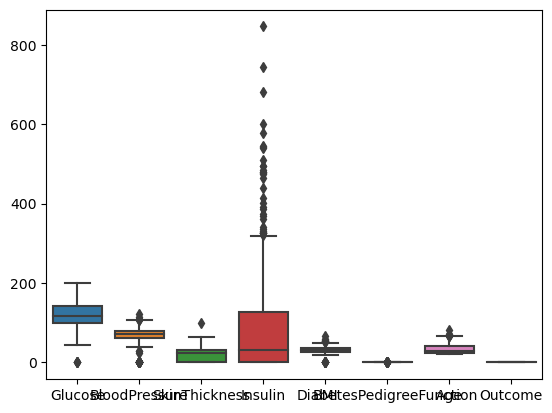

In [81]:
sns.boxplot(data=df)

In [82]:
# here we detected some outliers in Insulin feature, but our aim is not to handle that but is to create neural network.

In [83]:
df['Outcome'].value_counts()   #Imbalanced data

0    500
1    268
Name: Outcome, dtype: int64

In [84]:
# splitting data

In [85]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=22,stratify=y, test_size=0.25)

In [86]:
# before passing data to the neural network we have to scale down the values. we will with standardscalar

In [87]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [88]:
x_train_scaled.shape

(576, 7)

In [89]:
x_test_scaled.shape

(192, 7)

In [90]:
# build Neural Network

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [92]:
model =Sequential()
model.add(Dense(7,activation= 'relu', input_dim=7))        #input layer
model.add(Dense(7, activation = 'relu'))                   #hidden layer
model.add(Dense(1, activation = 'sigmoid'))                #output layer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(x_train_scaled, y_train, epochs=110, batch_size=32, validation_split=0.1)

Epoch 1/110


17/17 [==============================] - 1s 10ms/step - loss: 0.6773 - accuracy: 0.6506 - val_loss: 0.6286 - val_accuracy: 0.6552
Epoch 2/110
17/17 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6506 - val_loss: 0.6174 - val_accuracy: 0.6552
Epoch 3/110
17/17 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6525 - val_loss: 0.6080 - val_accuracy: 0.6552
Epoch 4/110
17/17 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6525 - val_loss: 0.5986 - val_accuracy: 0.6552
Epoch 5/110
17/17 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6583 - val_loss: 0.5893 - val_accuracy: 0.6897
Epoch 6/110
17/17 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6544 - val_loss: 0.5798 - val_accuracy: 0.6897
Epoch 7/110
17/17 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.6564 - val_loss: 0.5709 - val_accuracy: 0.6897
Epoch 8/110
17/17 [=====

In [94]:
y_log = model.predict(x_test_scaled)

6/6 [==============================] - 0s 2ms/step


In [95]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [96]:
#Evaluation

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       125
           1       0.73      0.72      0.72        67

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



In [98]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[107  18]
 [ 19  48]]


In [100]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8073
Test Loss: 0.47687801718711853
Test Accuracy: 0.8072916865348816


In [101]:
# Save the model
model.save('my_model.h5')